## Importing Data

In [97]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('../../data/processed/yp_competitors_rws_0001_0050_basicfeatures.csv')
df2 = pd.read_csv('../../data/processed/yp_competitors_rws_0001_0050_textfeatures.csv')
df = df1.merge(df2, on=['alias', 'ratingValue', 'dataPublished', 'description', 'author'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19019
Data columns (total 26 columns):
alias               19020 non-null object
ratingValue         19020 non-null int64
dataPublished       19020 non-null object
description         19020 non-null object
author              19020 non-null object
sentiment           19020 non-null int64
word_count          19020 non-null int64
sent_count          19020 non-null int64
chr_count           19020 non-null int64
avg_word_len        19020 non-null float64
avg_sent_len        19020 non-null float64
num_of_stopwords    19020 non-null int64
num_of_modals       19020 non-null int64
hashtags            19020 non-null int64
mentions            19020 non-null int64
numerics            19020 non-null int64
uppercase_cnt       19020 non-null int64
punctuation_cnt     19020 non-null int64
vocab_cnt           19020 non-null int64
ratio_lexical       19020 non-null float64
ratio_content       19020 non-null float64
sent_tokens       

In [98]:
# import fixes
from itertools import chain
import ast
# csv list fix with : ast
df.sent_tokens = df.sent_tokens.apply(lambda x: ast.literal_eval(x))

df.word_tokens_doc = df.word_tokens_doc.apply(lambda x: ast.literal_eval(x))
df.norm_tokens_doc = df.norm_tokens_doc.apply(lambda x: ast.literal_eval(x))
df.word_tokens = df.word_tokens.apply(lambda x: ast.literal_eval(x))
df.norm_tokens = df.norm_tokens.apply(lambda x: ast.literal_eval(x))

In [99]:
df.loc[:, ['sent_tokens', 'word_tokens_doc', 'norm_tokens_doc']].head()

,sent_tokens,word_tokens_doc,norm_tokens_doc
0,[I stumbled across this great restaurant overl...,"[(I, stumbled, across, this, great, restaurant...","[(stumbl, across, great, restaur, overlook, oc..."
1,"[Excellent view on the ocean at sunset., Excel...","[(Excellent, view, on, the, ocean, at, sunset,...","[(excel, view, ocean, sunset), (excel, food), ..."
2,[This place was not what the reviews portrayed...,"[(This, place, was, not, what, the, reviews, p...","[(place, review, portray), (starter, walk, sta..."
3,[We were excited to repeat our Keoki's (in Kau...,"[(We, were, excited, to, repeat, our, Keoki, '...","[(excit, repeat, keoki, 's, kauai, lovefest, s..."
4,"[If you're looking for a tourist spot, this is...","[(If, you, 're, looking, for, a, tourist, spot...","[('re, look, tourist, spot), (unfortun, could,..."


In [100]:
df.head()

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,uppercase_cnt,punctuation_cnt,vocab_cnt,ratio_lexical,ratio_content,sent_tokens,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.,1,135,11,664,4.022222,...,10,17,76,0.637037,0.674074,[I stumbled across this great restaurant overl...,"[(I, stumbled, across, this, great, restaurant...","[(stumbl, across, great, restaur, overlook, oc...","[I, stumbled, across, this, great, restaurant,...","[stumbl, across, great, restaur, overlook, oce..."
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.,1,36,5,160,3.611111,...,0,6,25,0.777778,0.638889,"[Excellent view on the ocean at sunset., Excel...","[(Excellent, view, on, the, ocean, at, sunset,...","[(excel, view, ocean, sunset), (excel, food), ...","[Excellent, view, on, the, ocean, at, sunset, ...","[excel, view, ocean, sunset, excel, food, fres..."
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.,0,275,14,1229,3.596364,...,5,31,130,0.534545,0.567273,[This place was not what the reviews portrayed...,"[(This, place, was, not, what, the, reviews, p...","[(place, review, portray), (starter, walk, sta...","[This, place, was, not, what, the, reviews, po...","[place, review, portray, starter, walk, stair,..."
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.,0,475,34,2226,3.783158,...,7,43,206,0.484211,0.604211,[We were excited to repeat our Keoki's (in Kau...,"[(We, were, excited, to, repeat, our, Keoki, '...","[(excit, repeat, keoki, 's, kauai, lovefest, s...","[We, were, excited, to, repeat, our, Keoki, 's...","[excit, repeat, keoki, 's, kauai, lovefest, si..."
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.,0,168,10,776,3.732143,...,1,21,97,0.648810,0.636905,"[If you're looking for a tourist spot, this is...","[(If, you, 're, looking, for, a, tourist, spot...","[('re, look, tourist, spot), (unfortun, could,...","[If, you, 're, looking, for, a, tourist, spot,...","['re, look, tourist, spot, unfortun, could, n'..."


## Models

### Topic Modeling

#### Document is Reviews

In [101]:
# documents are reviews
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

data = df.norm_tokens[:100]

id2word = Dictionary(documents=data)
doc_term_matrix = [id2word.doc2bow(doc) for doc in data]
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(
    corpus=doc_term_matrix,
    id2word=id2word,
    num_topics=10, 
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
data.head()

0    [stumbl, across, great, restaur, overlook, oce...
1    [excel, view, ocean, sunset, excel, food, fres...
2    [place, review, portray, starter, walk, stair,...
3    [excit, repeat, keoki, 's, kauai, lovefest, si...
4    ['re, look, tourist, spot, unfortun, could, n'...
Name: norm_tokens, dtype: object

In [102]:
# lda test
perplexity = lda_model.log_perplexity(doc_term_matrix)
coherence = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v').get_coherence()
print(perplexity, ',', coherence)

-7.101426671191072 , 0.27825371332849375


In [120]:
# optimal topic numbers
coherence_values = []
model_list = []
for num_topics in range(2, 40, 4):
    model = Lda(
        corpus=doc_term_matrix,
        id2word=id2word,
        num_topics=num_topics, 
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
optimal_model, optimal_coherence = max(((i,y) for i,y in zip(model_list, coherence_values)), key=lambda x: x[1])
optimal_coherence

0.32474995085991565

In [123]:
optimal_model.num_topics

30

In [118]:
((i,y) for i,y in zip(model_list, coherence_values))

<generator object <genexpr> at 0x1a36a0ecf0>

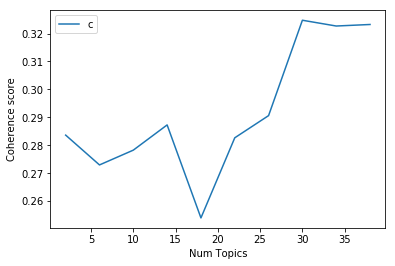

In [124]:
# to select number of topics
import matplotlib.pyplot as plt
x = range(2, 40, 4)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_path = '../../model/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=20, id2word=id2word)

In [ ]:
a = []; b = []
for doc_topic_list in lda_model.get_document_topics(doc_term_matrix):
    dtp = max(doc_topic_list, key=lambda x: x[1])
    a.append(dtp)
    doc_topic_list.remove(dtp)
    b.append(doc_topic_list)
pd.concat([df.iloc[:100,:], pd.DataFrame(a)], axis=1)

#### Document is Sentences

In [6]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

data = pd.Series(list(chain(*df.norm_tokens_doc)), name='norm_tokens_doc')

id2word = Dictionary(documents=data)
doc_term_matrix = [id2word.doc2bow(doc) for doc in data]
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(
    corpus=doc_term_matrix,
    id2word=id2word,
    num_topics=10, 
    random_state=100,
    update_every=1, # online iterative learning
    chunksize=100,
    passes=5,
    distributed=False,
    alpha='auto',
    per_word_topics=True
)

In [18]:
lda_model.show_topics(num_words=4)

[(0, '0.038*"beach" + 0.032*"also" + 0.030*"lahaina" + 0.028*"made"'),
 (1, '0.066*"like" + 0.053*"best" + 0.045*"tri" + 0.035*"littl"'),
 (2, '0.069*"back" + 0.069*"u" + 0.057*"delici" + 0.028*"sauc"'),
 (3, '0.122*"food" + 0.108*"good" + 0.046*"would" + 0.028*"price"'),
 (4, '0.064*"maui" + 0.037*"come" + 0.030*"meal" + 0.030*"tabl"'),
 (5, '0.064*"..." + 0.043*"even" + 0.040*"wait" + 0.037*"amaz"'),
 (6, '0.088*"great" + 0.066*"place" + 0.062*"servic" + 0.046*"one"'),
 (7, '0.145*"\'s" + 0.070*"time" + 0.031*"ruth" + 0.027*"went"'),
 (8, '0.095*"pizza" + 0.063*"order" + 0.042*"taco" + 0.033*"steak"'),
 (9, '0.110*"n\'t" + 0.059*"get" + 0.047*"realli" + 0.043*"nice"')]

In [94]:
fname = '../../model/lda_model_0001_0050_simple_doc2bow'
# save
lda_model.save(fname)

# load
Lda = gensim.models.ldamodel.LdaModel
saved_model = Lda.load(fname)
saved_model.show_topics(num_words=4)

[(0, '0.038*"beach" + 0.032*"also" + 0.030*"lahaina" + 0.028*"made"'),
 (1, '0.066*"like" + 0.053*"best" + 0.045*"tri" + 0.035*"littl"'),
 (2, '0.069*"back" + 0.069*"u" + 0.057*"delici" + 0.028*"sauc"'),
 (3, '0.122*"food" + 0.108*"good" + 0.046*"would" + 0.028*"price"'),
 (4, '0.064*"maui" + 0.037*"come" + 0.030*"meal" + 0.030*"tabl"'),
 (5, '0.064*"..." + 0.043*"even" + 0.040*"wait" + 0.037*"amaz"'),
 (6, '0.088*"great" + 0.066*"place" + 0.062*"servic" + 0.046*"one"'),
 (7, '0.145*"\'s" + 0.070*"time" + 0.031*"ruth" + 0.027*"went"'),
 (8, '0.095*"pizza" + 0.063*"order" + 0.042*"taco" + 0.033*"steak"'),
 (9, '0.110*"n\'t" + 0.059*"get" + 0.047*"realli" + 0.043*"nice"')]

In [8]:
df.norm_tokens_doc.count()

19020

In [7]:
len(lda_model.get_document_topics(doc_term_matrix))

136033

In [9]:
# score topic and probabilities to each document (sentence in this case)
a = []; b = []
for doc_topic_list in lda_model.get_document_topics(doc_term_matrix):
    dtp = max(doc_topic_list, key=lambda x: x[1])
    a.append(dtp)
    doc_topic_list.remove(dtp)
    b.append(doc_topic_list)

pd_sent_topic = pd.concat([data, pd.DataFrame(a, columns=['topic', 'prob'])], axis=1)
pd_sent_topic.head()

,norm_tokens_doc,topic,prob
0,"(stumbl, across, great, restaur, overlook, oce...",5,0.181670
1,"(high, expect, place, boy, blow, water)",2,0.186504
2,"(fish, chip, best, 've, ever, 've, lot, includ...",1,0.237983
3,"(highli, recommend)",3,0.174916
4,"(also, turkey, bacon, sandwich, good)",6,0.142321


In [19]:
pd_sent_topic.count()

norm_tokens_doc    136033
topic              136033
prob               136033
dtype: int64

In [10]:
# document/review topic prob distribution
lda_model[doc_term_matrix][9]

[(0, 0.07618688),
 (1, 0.29323208),
 (2, 0.058359765),
 (3, 0.11239939),
 (4, 0.0752151),
 (5, 0.069250196),
 (6, 0.09821621),
 (7, 0.062355176),
 (8, 0.08586889),
 (9, 0.06891633)]

In [11]:
# document/review topic prob distribution
lda_model.get_document_topics(doc_term_matrix[9])

[(0, 0.07618688),
 (1, 0.29323208),
 (2, 0.058359765),
 (3, 0.11239939),
 (4, 0.0752151),
 (5, 0.069250196),
 (6, 0.09821621),
 (7, 0.062355176),
 (8, 0.08586889),
 (9, 0.06891633)]

In [12]:
sum(w for i, w in lda_model[doc_term_matrix][9])

1.0000000223517418

In [13]:
data[0]
# df.norm_tokens_doc[0]

('stumbl',
 'across',
 'great',
 'restaur',
 'overlook',
 'ocean',
 'lunch',
 'vacat',
 'maui')

In [29]:
[i for i in df.norm_tokens_doc[0]]

[('stumbl',
  'across',
  'great',
  'restaur',
  'overlook',
  'ocean',
  'lunch',
  'vacat',
  'maui'),
 ('high', 'expect', 'place', 'boy', 'blow', 'water'),
 ('fish', 'chip', 'best', "'ve", 'ever', "'ve", 'lot', 'includ', 'london'),
 ('highli', 'recommend'),
 ('also', 'turkey', 'bacon', 'sandwich', 'good'),
 ('term', 'drink', 'highli', 'recommend', 'pacif', 'paradis', 'drink'),
 ('delici', 'tropic'),
 ('also', 'realli', 'enjoy', 'lahaina', 'lemonad'),
 ('servic', 'realli', 'great'),
 ('wish',
  'rememb',
  'waitress',
  'name',
  'truli',
  'awesom',
  'recommend',
  'best',
  'stuff'),
 ('blond', 'cute', 'sunglass')]

In [47]:
len(pd_sent_topic)

136033

In [48]:
sum(len(i) for i in df.norm_tokens_doc)

136033

In [81]:
[len(i) for i in df.norm_tokens_doc[:10]]

[11, 5, 14, 34, 10, 6, 6, 14, 8, 10]

In [46]:
pd_sent_topic.iloc[0:11,:]

,norm_tokens_doc,topic,prob
0,"(stumbl, across, great, restaur, overlook, oce...",5,0.181670
1,"(high, expect, place, boy, blow, water)",2,0.186504
2,"(fish, chip, best, 've, ever, 've, lot, includ...",1,0.237983
3,"(highli, recommend)",3,0.174916
4,"(also, turkey, bacon, sandwich, good)",6,0.142321
5,"(term, drink, highli, recommend, pacif, paradi...",3,0.297764
6,"(delici, tropic)",2,0.142629
7,"(also, realli, enjoy, lahaina, lemonad)",0,0.149166
8,"(servic, realli, great)",6,0.185749
9,"(wish, rememb, waitress, name, truli, awesom, ...",1,0.293232


In [41]:
pd_sent_topic.iloc[11:16,:]

,norm_tokens_doc,topic,prob
11,"(excel, view, ocean, sunset)",6,0.146975
12,"(excel, food)",3,0.139928
13,"(fresh, fish, coconut, yuzu, husband)",8,0.229818
14,"(love,)",6,0.126704
15,"(waitress, super, nice)",9,0.150506


In [43]:
pd_sent_topic.iloc[16:30,:]

,norm_tokens_doc,topic,prob
16,"(place, review, portray)",6,0.156842
17,"(starter, walk, stair, want, sit, balconi, cat...",8,0.226674
18,"(told, ask, sit, tabl, clean, coupl, left)",2,0.210729
19,"(wait, anoth, server, walk, right, u, sat, ano...",5,0.257854
20,"(end, wait, anoth, tabl, place, 40, min, tabl,...",4,0.237178
21,"(food, okay, ..., veget, option, ravioli, dish...",8,0.196095
22,"(tofu, although, look, like, nice, grill, piec...",3,0.219524
23,"('ve, tofu, plenti, time, actual, get, pick, f...",9,0.204731
24,"(true, dish)",8,0.176876
25,"(husband, fish, dish, rice, veggi, side, sweet...",8,0.356887


In [ ]:
# number of sentences and their topic/probs for the **first review**
pd_sent_topic[pd_sent_topic.norm_tokens_doc.apply(lambda x: tuple(x)).isin([i for i in df.norm_tokens_doc[0]])]

In [45]:
pd_doc_temp

,norm_tokens_doc,topic,prob


In [95]:
','.join(map(str, pd_doc_temp.topic))

'6,4,6,5,6,6,3,6,3,1,8'

In [ ]:
# 
# This is buggy, because the .isin(inner_list) select multiple occurances of inner_list and list populates with
# out of document sentences..
# 03/20/2019
#
topic_mode = []
topic_list = []
sent_topics = []
# score topic and probabilities to each document (**review** in this case)
for doc_sents in df.norm_tokens_doc[:100]:    
    # pd_doc_temp: the topic and the prob for the current document/ review: all sentences and their topic and probs
    pd_doc_temp = pd_sent_topic[pd_sent_topic.norm_tokens_doc.apply(lambda x: tuple(x)).isin([tuple(i) for i in doc_sents])]
    # find the most frequent topic in the review
    sent_topics.append(pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1).tolist())
    topic_mode.append(round(pd_doc_temp.topic.mode()[0]))    
    topic_list.append(','.join(map(str, pd_doc_temp.topic)))
    
df['sent_topics'] = pd.Series(sent_topics, name='sent_topics')
df['topic_mode'] = pd.Series(topic_mode, name='topic_mode')
df['topic_list'] = pd.Series(topic_list, name='topic_list')

In [82]:
# 
# This works since we are using indices of current document on the lda's documents
# 03/21/2019
#
topic_mode = []
topic_list = []
sent_topics = []
i, j = 0, 0
# score topic and probabilities to each document (**review** in this case)
for doc_sents in df.norm_tokens_doc:
    j = j + len(doc_sents)
    pd_doc_temp = pd_sent_topic.iloc[i:j,:]
    i = j
    
    sent_topics.append(pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1).tolist())
    topic_mode.append(round(pd_doc_temp.topic.mode()[0]))    
    topic_list.append(','.join(map(str, pd_doc_temp.topic)))
    
df['sent_topics'] = pd.Series(sent_topics, name='sent_topics')
df['topic_mode'] = pd.Series(topic_mode, name='topic_mode')
df['topic_list'] = pd.Series(topic_list, name='topic_list')

In [84]:
pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1)

136022    (6, 0.14720681309700012)
136023    (4, 0.14807088673114777)
136024     (6, 0.1423206925392151)
136025    (5, 0.15356479585170746)
136026    (6, 0.18574859201908112)
136027    (6, 0.17367175221443176)
136028    (3, 0.12663573026657104)
136029    (6, 0.13902904093265533)
136030    (3, 0.13209319114685059)
136031    (1, 0.17586977779865265)
136032    (8, 0.17008419334888458)
dtype: object

In [83]:
df.loc[:, ['alias', 'ratingValue', 'word_tokens_doc', 'topic_mode', 'topic_list', 'sent_topics']].head()

,alias,ratingValue,word_tokens_doc,topic_mode,topic_list,sent_topics
0,kimos-maui-lahaina,5,"[(I, stumbled, across, this, great, restaurant...",1,"5,2,1,3,6,3,2,0,6,1,5","[(5, 0.181669682264328), (2, 0.186504259705543..."
1,kimos-maui-lahaina,5,"[(Excellent, view, on, the, ocean, at, sunset,...",6,"6,3,8,6,9","[(6, 0.146974578499794), (3, 0.139927998185157..."
2,kimos-maui-lahaina,3,"[(This, place, was, not, what, the, reviews, p...",8,"6,8,2,5,4,8,3,9,8,8,8,1,7,6","[(6, 0.15684203803539276), (8, 0.2266744673252..."
3,kimos-maui-lahaina,2,"[(We, were, excited, to, repeat, our, Keoki, '...",2,"2,4,9,0,5,3,7,1,0,4,0,5,5,8,6,9,2,8,6,2,2,1,6,...","[(2, 0.1735130101442337), (4, 0.13328838348388..."
4,kimos-maui-lahaina,3,"[(If, you, 're, looking, for, a, tourist, spot...",6,"6,9,8,6,4,0,5,3,1,9","[(6, 0.1469745934009552), (9, 0.20430350303649..."


In [87]:
df.to_csv('../../data/processed/yp_competitors_rws_0001_0050_topics.csv', index=False)

In [86]:
pd_doc_temp

,norm_tokens_doc,topic,prob
136022,"(husband, surpris, birthday, cake, kristi)",6,0.147207
136023,"(last, minut, abl, make, happen)",4,0.148071
136024,"(unfortun, n't, like, pineappl, cake)",6,0.142321
136025,"(thought, kind, dri, side, also, may, fridg, d...",5,0.153565
136026,"(cake, gluten, free)",6,0.185749
136027,"('m, sure, realiz, specialti, bakeri)",6,0.173672
136028,"(like, carrot, cake, 's, fave)",3,0.126636
136029,"(anyway, sweet, gestur, husband, 's, part, eve...",6,0.139029
136030,"(thank, kristi, short, notic, cake)",3,0.132093
136031,"('m, sure, could, 've, gotten, someth, like, w...",1,0.175870


In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[doc_term_matrix]):
    topic_weights.append([w for i, w in row_list])

In [ ]:
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0)

In [ ]:
# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]
arr.shape

# Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

In [ ]:
# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
pca_lda = pca.fit_transform(arr)
pca_lda.shape

In [ ]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)
tsne_lda.shape

In [ ]:
import matplotlib.pyplot as plt
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   
    y = range(X.shape[0])
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 'x',
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
plot_embedding(tsne_lda)

In [ ]:
plt.scatter(pca_lda[:,0], pca_lda[:,1], color=plt.cm.Set1(range(len(pca_lda))))

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary=lda_model.id2word)
vis